In [ ]:
from google.colab import files
uploaded = files.upload()

Saving DSC_503_regression diagnostics.csv to DSC_503_regression diagnostics.csv


In [ ]:
import pandas as pd
df = pd.read_csv('DSC_503_regression diagnostics.csv')

In [ ]:
df

,ses,math,size,english
0,-1.528,5.876,842,23.607
1,-0.588,19.708,842,24.656
2,-0.528,20.349,842,24.970
3,-0.668,8.781,842,24.569
4,-0.158,17.898,842,24.849
...,...,...,...,...
7180,1.512,20.402,262,27.024
7181,-0.038,14.794,262,24.977
7182,1.332,19.641,262,27.304
7183,-0.008,16.241,262,25.413


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model_ols_mul = ols("math ~ ses + size + english", data=df).fit()

In [ ]:
print(model_ols_mul.summary())

                            OLS Regression Results                            
Dep. Variable:                   math   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     360.5
Date:                Fri, 21 Mar 2025   Prob (F-statistic):          4.16e-218
Time:                        22:53:24   Log-Likelihood:                -23546.
No. Observations:                7185   AIC:                         4.710e+04
Df Residuals:                    7181   BIC:                         4.713e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.4233      9.241      2.102      0.0

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [ ]:
X = df[["ses","size","english"]]
X = sm.add_constant(X)

In [ ]:
VIF_data = pd.DataFrame()
VIF_data["variable"] = X.columns
VIF_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIF_data)

  variable           VIF
0    const  14916.222933
1      ses     21.157960
2     size      1.006213
3  english     21.130414


<Axes: >

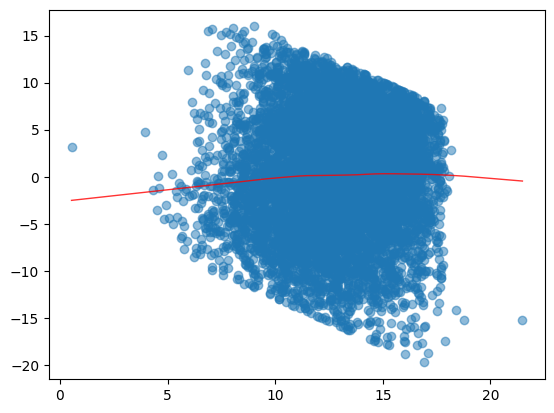

In [ ]:
fitted = model_ols_mul.fittedvalues
residual = model_ols_mul.resid
import seaborn as sns
sns.regplot(x = fitted , y = residual, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})

/usr/local/lib/python3.11/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


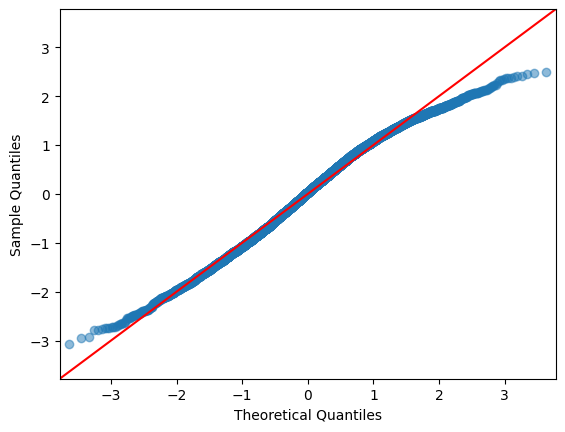

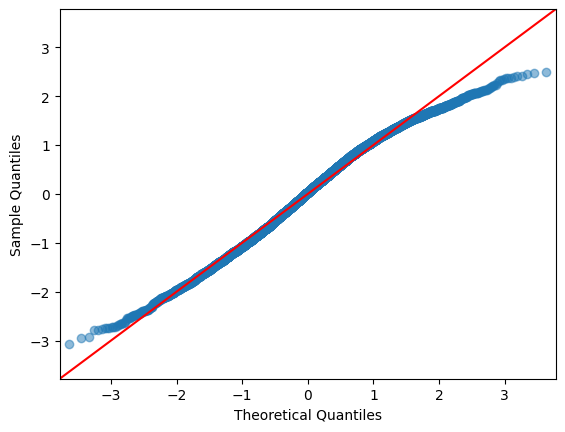

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import ProbPlot
QQ =sm.ProbPlot(model_ols_mul.get_influence().resid_studentized_internal,fit=True)
QQ.qqplot(line='45', alpha=0.5, color='red', lw=1)

<Axes: >

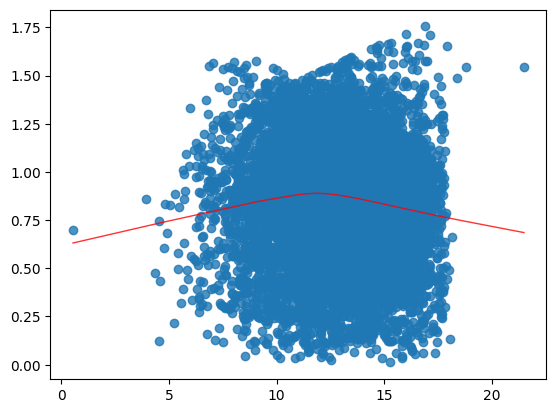

In [ ]:
import numpy as np
norm_residuals = model_ols_mul.get_influence().resid_studentized_internal
norm_residuals_abs_sqrt = np.sqrt(np.abs(norm_residuals))
sns.regplot(x = fitted , y = norm_residuals_abs_sqrt, lowess=True, ci=False,line_kws= {'color': 'red', 'lw': 1, 'alpha': 0.8})

In [ ]:
import statsmodels.stats.api as sms
bptest = sms.het_breuschpagan(model_ols_mul.resid, model_ols_mul.model.exog)
bptest

(np.float64(14.063115877385133),
 np.float64(0.0028204879707121023),
 np.float64(4.694283640914616),
 np.float64(0.0028113510233531004))